In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from keras.layers import Dense,InputLayer

In [5]:
class PINN(tf.keras.Model):
    def __init__(self):
        super (PINN,self).__init__()
        self.dense1 = Dense(100,activation='relu',inpu_dim=2)
        self.dense2 = Dense(100,activation='relu')
        self.output_layer = Dense(units=1,activation='sigmoid')

    def call(self,inputs):
        X = input[:,0:1]
        t = input[:,0:2]
        concat_inputs = tf.concat([X,t],axis=1)
        hidden_layer1 = self.dense1(concat_inputs)
        hidden_layer2 = self.dense2(hidden_layer1)
        output_layer1 = self.output_layer(hidden_layer2)

        return output_layer1

In [ ]:
def physics_loss_function(model,X,t):
    

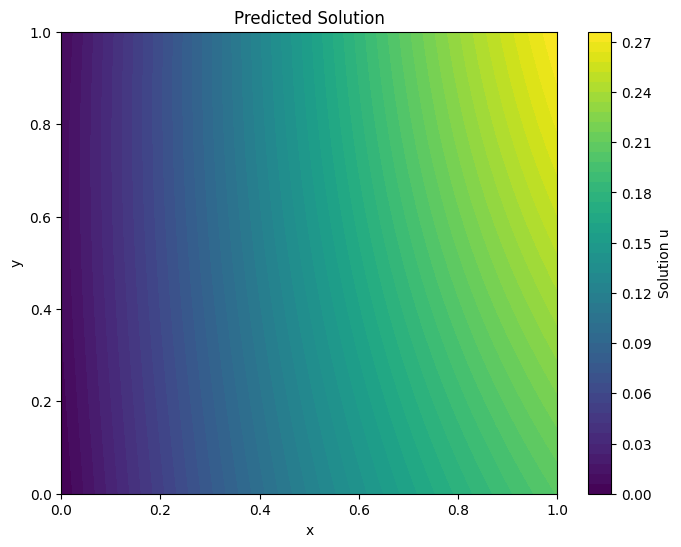

In [19]:

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# PINN Model
class PINN(tf.keras.Model):
    def __init__(self, layers_dims):
        super(PINN, self).__init__()
        self.hidden_layers = [layers.Dense(dim, activation='tanh') for dim in layers_dims]
        self.output_layer = layers.Dense(1)

    def call(self, inputs):
        x = inputs
        for layer in self.hidden_layers:
            x = layer(x)
        return self.output_layer(x)

# Loss for PDE
def loss_pde(model, inputs, velocity, D):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(inputs)
        u = model(inputs)
        u_t = tape.gradient(u, inputs[:, 2:3])
        u_x = tape.gradient(u, inputs[:, 0:1])
        u_y = tape.gradient(u, inputs[:, 1:2])
        u_xx = tape.gradient(u_x, inputs[:, 0:1])
        u_yy = tape.gradient(u_y, inputs[:, 1:2])
    del tape
    u_residual = u_t + velocity[0] * u_x + velocity[1] * u_y - D * (u_xx + u_yy)
    return tf.reduce_mean(tf.square(u_residual))

# Loss for boundary conditions
def loss_boundary(model, boundary_inputs, boundary_values):
    u_boundary = model(boundary_inputs)
    return tf.reduce_mean(tf.square(u_boundary - boundary_values))

# Loss for initial conditions
def loss_initial(model, initial_inputs, initial_values):
    u_initial = model(initial_inputs)
    return tf.reduce_mean(tf.square(u_initial - initial_values))

# Generate training points
class Domain:
    @staticmethod
    def generate_circle(center, radius, num_points):
        angles = np.linspace(0, 2 * np.pi, num_points)
        x = center[0] + radius * np.cos(angles)
        y = center[1] + radius * np.sin(angles)
        return np.stack((x, y), axis=-1)

    @staticmethod
    def generate_square(corner, size, num_points):
        x = np.linspace(corner[0], corner[0] + size, num_points)
        y = np.linspace(corner[1], corner[1] + size, num_points)
        top = np.stack((x, np.full_like(x, corner[1] + size)), axis=-1)
        bottom = np.stack((x, np.full_like(x, corner[1])), axis=-1)
        left = np.stack((np.full_like(y, corner[0]), y), axis=-1)
        right = np.stack((np.full_like(y, corner[0] + size), y), axis=-1)
        return np.concatenate((top, bottom, left, right), axis=0)

    @staticmethod
    def generate_triangle(vertices, num_points):
        v1, v2, v3 = vertices
        edge1 = np.linspace(v1, v2, num_points)
        edge2 = np.linspace(v2, v3, num_points)
        edge3 = np.linspace(v3, v1, num_points)
        return np.concatenate((edge1, edge2, edge3), axis=0)

# Visualization
def visualize_solution(model, domain_points, resolution=100):
    x = np.linspace(domain_points[0][0], domain_points[1][0], resolution)
    y = np.linspace(domain_points[0][1], domain_points[1][1], resolution)
    X, Y = np.meshgrid(x, y)
    inputs = np.stack((X.flatten(), Y.flatten(), np.zeros_like(X.flatten())), axis=-1)
    u_pred = model(inputs).numpy().reshape((resolution, resolution))
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, u_pred, levels=50, cmap='viridis')
    plt.colorbar(label='Solution u')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Predicted Solution')
    plt.show()

# Main workflow
def main():
    # Define neural network
    layers_dims = [20, 20, 20]
    model = PINN(layers_dims)

    # Parameters
    velocity = [1.0, 0.5]
    diffusion_coeff = 0.01

    # Generate domain points
    circle_points = Domain.generate_circle(center=(0.5, 0.5), radius=0.3, num_points=100)
    square_points = Domain.generate_square(corner=(0.2, 0.2), size=0.4, num_points=100)
    triangle_points = Domain.generate_triangle(vertices=[(0.7, 0.3), (0.9, 0.6), (0.8, 0.8)], num_points=100)

    # Training loop (pseudo-code for modularity)
    # - Prepare initial and boundary conditions
    # - Optimize loss functions
    # - Visualize results
    visualize_solution(model, domain_points=[(0, 0), (1, 1)])

if __name__ == "__main__":
    main()